<a href="https://colab.research.google.com/github/otavioaugusto1/Introduction-to-classification-with-Sklearn/blob/master/Python_scikit_learn_regress%C3%A3o%2C_classifica%C3%A7%C3%A3o_e_clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import sklearn
import pandas as pd

In [17]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(10)

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo
5,5,116,74,0,0,25.6,0.201,30,testado_negativo
6,3,78,50,32,88,31.0,0.248,26,testado_positivo
7,10,115,0,0,0,35.3,0.134,29,testado_negativo
8,2,197,70,45,543,30.5,0.158,53,testado_positivo
9,8,125,96,0,0,0.0,0.232,54,testado_positivo


In [18]:
batimentos = pd.read_csv("batimentos cardiacos.csv")
batimentos.head(10)

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063
5,67.915027,129.328086,22.332022,142.637469
6,78.985955,164.755057,31.188764,173.544747
7,67.860845,129.154703,22.288676,142.660185
8,60.484291,105.549733,16.387433,122.848438
9,71.547935,140.953393,25.238348,153.653358


In [19]:
colesterol = pd.read_csv("colesterol.csv")
colesterol.head(10)

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204
5,56,1,2,120,0,0,178,0,0.8,1,0,3,0,236
6,62,0,4,140,0,2,160,0,3.6,3,2,3,3,268
7,57,0,4,120,0,0,163,1,0.6,1,0,3,0,354
8,63,1,4,130,0,2,147,0,1.4,2,1,7,2,254
9,53,1,4,140,1,2,155,1,3.1,3,0,7,1,203


Classificação

In [20]:
x = diabetes.drop("resultado",axis = 1)
x

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y = diabetes['resultado']
y

0      testado_positivo
1      testado_negativo
2      testado_positivo
3      testado_negativo
4      testado_positivo
             ...       
763    testado_negativo
764    testado_negativo
765    testado_negativo
766    testado_positivo
767    testado_negativo
Name: resultado, Length: 768, dtype: object

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_treino,x_teste,y_treino, y_teste = train_test_split(x,y)

In [24]:
from sklearn.tree import DecisionTreeClassifier


In [25]:
clf_arv = DecisionTreeClassifier(max_depth=3)

In [26]:
clf_arv.fit(x_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
clf_arv.score(x_teste,y_teste)

0.7395833333333334

In [28]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(strategy = "most_frequent")
clf_dummy.fit(x_treino,y_treino)
clf_dummy.score(x_teste,y_teste)

0.65625

Regressão

• Regressão: são estimados valores, já na classificação, são "sim" ou "não".

In [29]:
batimentos.head()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


<Figure size 7200x3600 with 0 Axes>

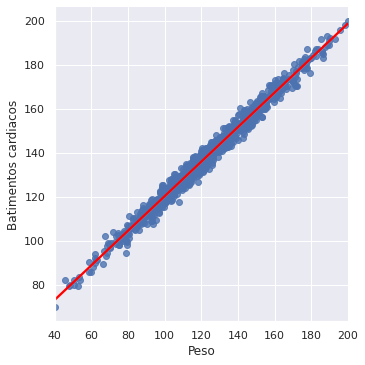

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(100, 50))

sns.lmplot(x='Peso', y='Batimentos cardiacos', data=batimentos,line_kws={'color':'red'})
plt.show()

In [31]:
x = batimentos[['Peso','Idade']]
x

,Peso,Idade
0,53.591343,44.247295
1,172.569375,81.427930
2,74.582817,50.807130
3,90.491878,55.778712
4,84.129280,53.790400
...,...,...
995,188.432199,86.385062
996,115.620461,63.631394
997,139.842839,71.200887
998,111.959082,62.487213


In [32]:
y = batimentos['Batimentos cardiacos']
y

0       82.307425
1      179.045377
2      103.522796
3      114.239779
4      107.184063
          ...    
995    189.035111
996    130.773648
997    150.330074
998    129.754953
999    148.239707
Name: Batimentos cardiacos, Length: 1000, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split

SEED=4500

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = SEED)

In [34]:
from sklearn import linear_model

rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [35]:
rgs.fit(x_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [36]:
rgs.score(x_teste, y_teste)

0.9872272899997122

Clustering: aprendizado não-supervisionado

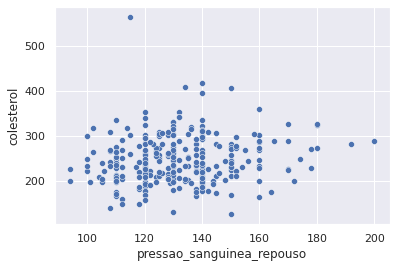

In [37]:
import seaborn as sns

sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol)

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 9)
colesterol =colesterol.select_dtypes('int64')

In [46]:
kmeans.fit(x)
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,